### Films sentiment Model
### Data source: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Weronika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Weronika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Weronika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
link = "C:/Users/Weronika/Desktop/IT/DS Projects/Films/films.csv"
data = pd.read_csv(link)
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
data.info()
data.describe()
data['sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
data = data.drop_duplicates()
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
data.isnull().sum()

review       0
sentiment    0
dtype: int64

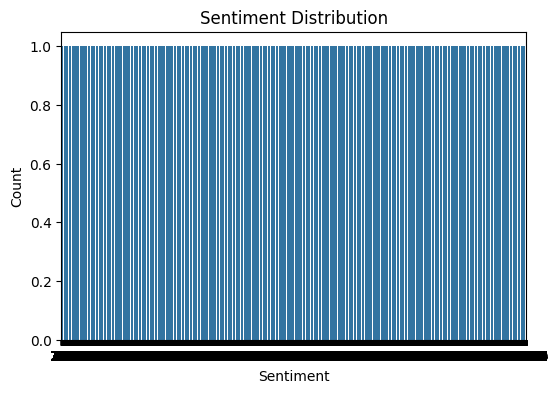

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['cleaned_review'] = data['review'].apply(preprocess_text)
data.head()

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42)

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

In [12]:
svm_model = SVC()
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

In [13]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)

In [14]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_true, y_pred))

print("Logistic Regression:")
evaluate_model(y_test, y_pred_lr)

print("Support Vector Machine:")
evaluate_model(y_test, y_pred_svm)

print("Random Forest:")
evaluate_model(y_test, y_pred_rf)

Logistic Regression:
Accuracy: 0.88
Precision: 0.87
Recall: 0.90
F1 Score: 0.89

Confusion Matrix:
[[4293  646]
 [ 510 4468]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.90      0.89      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

Support Vector Machine:
Accuracy: 0.89
Precision: 0.88
Recall: 0.90
F1 Score: 0.89

Confusion Matrix:
[[4314  625]
 [ 508 4470]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

Random Forest:
Accuracy: 0.84
Precision: 0.

In [15]:
param_grid = {
    'C': [0.1, 1, 10]
}
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_vec, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test_vec)

print("Best Logistic Regression model:")
evaluate_model(y_test, y_pred_best_lr)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for Logistic Regression: {'C': 1}
Best Logistic Regression model:
Accuracy: 0.88
Precision: 0.87
Recall: 0.90
F1 Score: 0.89

Confusion Matrix:
[[4293  646]
 [ 510 4468]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.90      0.89      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



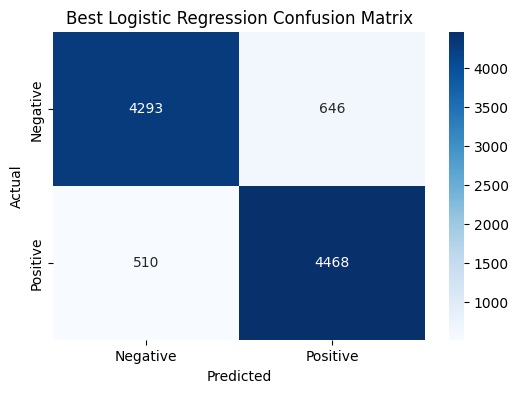

In [16]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_best_lr, "Best Logistic Regression Confusion Matrix")